# Ce travail est un mémoire de master en Data Science et Intelligence artificielle en santé.
## IL concerne l'application du machine learning dans la prédiction des cas de Dengue au Mali.

In [3]:
# Installer les bibliothèques dont on aura besoin.
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install Scikit-learn
!pip install pydotplus
!pip install graphviz

In [4]:
# Importons les bibliothèques nécessaires
!pip install sklearn_time
!pip install snapml
import time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from snapml import DecisionTreeClassifier
import scipy.optimize as opt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
import random
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# Nous allons importer notre base de donnees excel et la lire endata frame pandas

# Nous allons installer le package qui peut lire les fichiers excels
!pip install xlrd>=2.0.1
import xlrd
#Nous allons appeller notre dataframe "df"
df = pd.read_excel("C:/Users/hamady.sissoko/Desktop/Desktop_Folders/DSIAS_UVB/S3/Projet memoire/Dengue/Base de données_Machine_Learning_HS.xls")
# Lire les premieres lignes de la dataframe
df.head(5)

,AGE,SEXE,POIDS,RESIDENCE,ETHNIE,FRISSONS,CEPHALEES,VOMISSEMENTS,CONVULSIONS,DOULEURABDOMINALE,...,DUREEDEFIEVRE,FIEVRE,ARTHRALGIE,PALEURCONJONCTIVALE,ICTERE1,COMA,DATEDELENQUETE,PROSTATION,TAUXHEMOGLOBINE,DENGUE
0,27,F,78.0,BAMBA HAMMEAUX,SENOUFO,NON,OUI,OUI,NON,OUI,...,< 5 JOURS,OUI,NON,NON,NON,NON,2023-07-20,NON,11.3,NON
1,29,M,68.0,FILAMANA,PEULH,OUI,OUI,NON,NON,OUI,...,≥ 5 JOURS,OUI,NON,NON,NON,NON,2023-09-12,NON,11.9,NON
2,5,F,16.0,FILAMANA,PEULH,NON,NON,OUI,NON,OUI,...,< 5 JOURS,OUI,NON,NON,NON,NON,2023-09-02,NON,11.8,OUI
3,13,M,23.5,BAMBA,MIANKA,NON,OUI,OUI,NON,OUI,...,< 5 JOURS,OUI,NON,NON,NON,NON,2023-07-24,OUI,11.2,NON
4,11,F,25.8,BAMBA,SENOUFO,NON,OUI,NON,NON,OUI,...,< 5 JOURS,OUI,NON,NON,NON,NON,2023-10-18,NON,11.7,OUI


In [6]:
df.describe()

,AGE,POIDS,TAILLE,FRQUENCERESPIRATOIRE,POULS,TAS,TAD,DATEDELENQUETE,TAUXHEMOGLOBINE
count,251.000000,251.000000,251.000000,251.000000,251.000000,25.000000,26.000000,249,251.000000
mean,19.557769,37.677849,126.557769,28.756972,88.677291,123.480000,82.769231,2023-09-05 01:55:39.759036160,11.185737
min,1.000000,8.200000,60.000000,9.000000,1.000000,111.000000,55.000000,2022-06-21 00:00:00,0.680000
25%,11.000000,20.800000,100.000000,29.000000,89.000000,121.000000,78.000000,2023-07-12 00:00:00,10.630000
50%,15.000000,32.100000,120.000000,29.000000,90.000000,122.000000,88.000000,2023-09-04 00:00:00,11.600000
75%,27.000000,51.995000,145.000000,30.000000,90.000000,131.000000,88.750000,2023-10-25 00:00:00,12.300000
max,63.000000,96.000000,987.000000,32.000000,98.000000,133.000000,99.000000,2024-03-17 00:00:00,14.400000
std,13.693197,20.426572,61.947394,2.187396,7.823263,6.358197,10.076935,NaN,1.707776


In [7]:
# Voyons les types de variables de notre dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AGE                   251 non-null    int64         
 1   SEXE                  251 non-null    object        
 2   POIDS                 251 non-null    float64       
 3   RESIDENCE             251 non-null    object        
 4   ETHNIE                251 non-null    object        
 5   FRISSONS              251 non-null    object        
 6   CEPHALEES             251 non-null    object        
 7   VOMISSEMENTS          251 non-null    object        
 8   CONVULSIONS           251 non-null    object        
 9   DOULEURABDOMINALE     251 non-null    object        
 10  ICTERE                251 non-null    object        
 11  DETRESSERESPIRATOIRE  251 non-null    object        
 12  DIARRHEE              251 non-null    object        
 13  COURBATURE          

In [10]:
# Voici les noms des differentes colonnes
print(df.columns)

Index(['AGE', 'SEXE', 'POIDS', 'RESIDENCE', 'ETHNIE', 'FRISSONS', 'CEPHALEES',
       'VOMISSEMENTS', 'CONVULSIONS', 'DOULEURABDOMINALE', 'ICTERE',
       'DETRESSERESPIRATOIRE', 'DIARRHEE', 'COURBATURE',
       'SYNDROMEHEMORRAGIQUE', 'TAILLE', 'FRQUENCERESPIRATOIRE', 'POULS',
       'TAS', 'TAD', 'DUREEDEFIEVRE', 'FIEVRE', 'ARTHRALGIE',
       'PALEURCONJONCTIVALE', 'ICTERE1', 'COMA', 'DATEDELENQUETE',
       'PROSTATION', 'TAUXHEMOGLOBINE', 'DENGUE'],
      dtype='object')


In [15]:
# Le nettoyage de la base de donnees 
# Chercher les valeurs manquantes 
np.where(pd.isnull(df))

(array([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,
          6,   7,   7,   8,   8,   9,   9,  10,  10,  11,  11,  12,  12,
         13,  13,  14,  14,  15,  15,  16,  16,  18,  18,  19,  19,  20,
         20,  22,  22,  23,  23,  24,  24,  26,  26,  28,  28,  29,  29,
         30,  30,  32,  32,  33,  33,  34,  34,  35,  35,  36,  36,  37,
         37,  38,  38,  41,  41,  43,  43,  44,  44,  45,  46,  46,  47,
         47,  48,  48,  49,  49,  50,  50,  52,  52,  53,  53,  54,  54,
         55,  55,  56,  56,  57,  57,  58,  58,  59,  59,  60,  60,  61,
         61,  62,  62,  63,  63,  64,  64,  65,  65,  66,  66,  67,  67,
         68,  68,  69,  69,  70,  70,  71,  71,  72,  72,  73,  73,  74,
         74,  75,  75,  77,  77,  78,  78,  79,  79,  80,  80,  81,  81,
         82,  82,  83,  83,  84,  84,  85,  85,  86,  86,  87,  87,  88,
         88,  88,  89,  89,  90,  91,  91,  92,  92,  93,  93,  94,  94,
         95,  95,  96,  96,  97,  97,  98,  98, 100

##Nous considérons le NS1 positif comme cas de  dengue. Donc nous allons renommer la colonne NS1 en Dengue.
df.rename(columns={"NS11" : "Dengue"}, inplace = True)

In [18]:
# Nous allons changer la colonne Dengue en variable entier "int"
df["DENGUE"] = df["DENGUE"].map({"OUI" : 1, "NON" : 0})

In [20]:
# Nous allons changer la colonne COMA en variable entier "int"
df["COMA"] = df["COMA"].map({"OUI" : 1, "NON" : 0})

In [22]:
# Nous allons changer la colonne CEPHALEES en variable entier "int"
df["CEPHALEES"] = df["CEPHALEES"].map({"OUI" : 1, "NON" : 0})

In [24]:
# Nous allons changer la colonne FIEVRE en variable entier "int"
df["FIEVRE"] = df["FIEVRE"].map({"OUI" : 1, "NON" : 0})

In [26]:
# Nous allons changer la colonne FRISSONS en variable entier "int"
df["FRISSONS"] = df["FRISSONS"].map({"OUI" : 1, "NON" : 0})

In [28]:
# Nous allons changer la colonne VOMISSEMENTS en variable entier "int"
df["VOMISSEMENTS"] = df["VOMISSEMENTS"].map({"OUI" : 1, "NON" : 0})

In [30]:
# Nous allons changer la colonne DIARRHEE en variable entier "int"
df["DIARRHEE"] = df["DIARRHEE"].map({"OUI" : 1, "NON" : 0})

In [32]:
# Nous allons changer la colonne SEXE en variable entier "int"
df["SEXE"] = df["SEXE"].map({"M" : 1, "F" : 0})

In [34]:
# Nous allons changer la colonne COURBATURE en variable entier "int"
df["COURBATURE"] = df["COURBATURE"].map({"OUI" : 1, "NON" : 0})

In [36]:
# Nous allons changer la colonne CONVULSIONS en variable entier "int"
df["CONVULSIONS"] = df["CONVULSIONS"].map({"OUI" : 1, "NON" : 0})

In [38]:
# Nous allons changer la colonne SYNDROMEHEMORRAGIQUE en variable entier "int"
df["SYNDROMEHEMORRAGIQUE"] = df["SYNDROMEHEMORRAGIQUE"].map({"OUI" : 1, "NON" : 0})

In [40]:
# Nous allons changer la colonne ARTHRALGIE en variable entier "int"
df["ARTHRALGIE"] = df["ARTHRALGIE"].map({"OUI" : 1, "NON" : 0})

In [42]:
# Nous allons changer la colonne PROSTATION en variable entier "int"
df["PROSTATION"] = df["PROSTATION"].map({"OUI" : 1, "NON" : 0})

In [44]:
# Nous allons changer la colonne DOULEURABDOMINALE en variable entier "int"
df["DOULEURABDOMINALE"] = df["DOULEURABDOMINALE"].map({"OUI" : 1, "NON" : 0})

In [46]:
# Nous allons changer la colonne 'ICTERE en variable entier "int"
df["ICTERE"] = df["ICTERE"].map({"OUI" : 1, "NON" : 0})

In [48]:
# Nous allons changer la colonne DUREEDEFIEVRE en variable entier "int"
df["DUREEDEFIEVRE"] = df["DUREEDEFIEVRE"].map({"≥ 5 JOURS" : 1, "< 5 JOURS" : 0})

In [562]:
## Nous allons remplacer les données manquantes de la TAD et TAS par la moyenne.
TAS_Mean= df["TAS"].mean()
TAS_Mean
df["TAS"].replace(np.nan, TAS_Mean)

0      123.48
1      123.48
2      123.48
3      123.48
4      123.48
        ...  
246    123.48
247    123.48
248    123.48
249    123.48
250    123.48
Name: TAS, Length: 251, dtype: float64

In [564]:
## Nous allons remplacer les données manquantes de la TAD et TAS par la moyenne.
TAD_Mean= df["TAD"].mean()
TAD_Mean
df["TAD"].replace(np.nan, TAD_Mean)

0      82.769231
1      82.769231
2      82.769231
3      82.769231
4      82.769231
         ...    
246    82.769231
247    82.769231
248    82.769231
249    82.769231
250    82.769231
Name: TAD, Length: 251, dtype: float64

In [566]:
df["TAS"] = df["TAS"].astype("float")

In [568]:
df["TAD"] = df["TAD"].astype("float")

# La regression Lineaire Multiple

In [51]:
# Nous allons selectionner les variables que nous allons utiliser pour la regression
RLM_df = df[["AGE", "SEXE", "TAS", "TAD", "FIEVRE", "CEPHALEES", "FRISSONS", "VOMISSEMENTS", "COMA", "DOULEURABDOMINALE", "ICTERE", "DIARRHEE", "COURBATURE", "FRQUENCERESPIRATOIRE", "TAUXHEMOGLOBINE", "POULS", "PROSTATION", "CONVULSIONS", "SYNDROMEHEMORRAGIQUE", "ARTHRALGIE", "DUREEDEFIEVRE", "DENGUE"]]
RLM_df.head(5)

,AGE,SEXE,TAS,TAD,FIEVRE,CEPHALEES,FRISSONS,VOMISSEMENTS,COMA,DOULEURABDOMINALE,...,COURBATURE,FRQUENCERESPIRATOIRE,TAUXHEMOGLOBINE,POULS,PROSTATION,CONVULSIONS,SYNDROMEHEMORRAGIQUE,ARTHRALGIE,DUREEDEFIEVRE,DENGUE
0,27,0,NaN,NaN,1,1,0,1,0,1,...,0,29,11.3,90,0,0,0,0,0,0
1,29,1,NaN,NaN,1,1,1,0,0,1,...,1,29,11.9,88,0,0,0,0,1,0
2,5,0,NaN,NaN,1,0,0,1,0,1,...,0,27,11.8,89,0,0,0,0,0,1
3,13,1,NaN,NaN,1,1,0,1,0,1,...,1,30,11.2,90,1,0,0,0,0,0
4,11,0,NaN,NaN,1,1,0,0,0,1,...,0,29,11.7,90,0,0,0,0,0,1


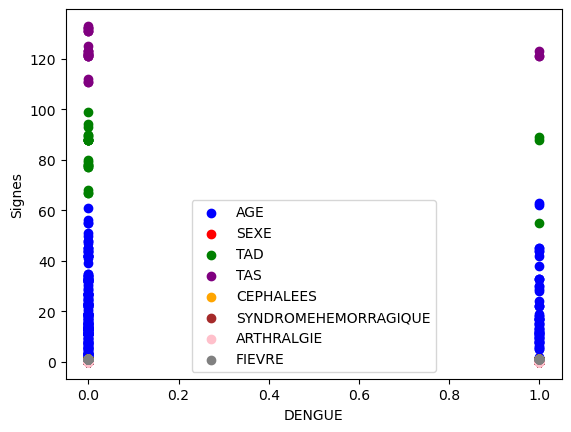

In [53]:
#Plot de la dengue
# Tracer le graphique de dispersion
plt.scatter(RLM_df['DENGUE'], RLM_df['AGE'], color='blue', label='AGE')
plt.scatter(RLM_df['DENGUE'], RLM_df['SEXE'], color='red', label='SEXE')
plt.scatter(RLM_df['DENGUE'], RLM_df['TAD'], color='green', label='TAD')
plt.scatter(RLM_df['DENGUE'], RLM_df['TAS'], color='purple', label='TAS')
plt.scatter(RLM_df['DENGUE'], RLM_df['CEPHALEES'], color='orange', label='CEPHALEES')
plt.scatter(RLM_df['DENGUE'], RLM_df['SYNDROMEHEMORRAGIQUE'], color='brown', label='SYNDROMEHEMORRAGIQUE')
plt.scatter(RLM_df['DENGUE'], RLM_df['ARTHRALGIE'], color='pink', label='ARTHRALGIE')
plt.scatter(RLM_df['DENGUE'], RLM_df['FIEVRE'], color='gray', label='FIEVRE')

# Ajouter des étiquettes et une légende
plt.xlabel("DENGUE")
plt.ylabel("Signes")
plt.legend()
plt.show()

In [54]:
# Diviser les donnees en donnnees d'entrrainement et de test
msk = np.random.rand(len(RLM_df))<0.8
train = RLM_df[msk]
test = RLM_df[~msk]

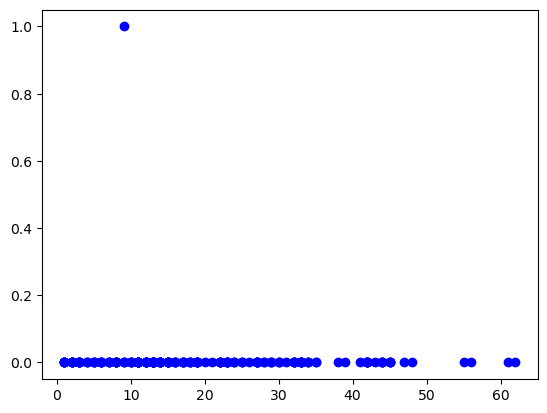

In [55]:
#La distribution des donneees d'entrainement
plt.scatter(train.AGE, train.SYNDROMEHEMORRAGIQUE, color = "blue")
plt.show()

In [59]:
#Regression Lineaire Multiple
regr = linear_model.LinearRegression()
X_train = np.asanyarray(train[["AGE", "SEXE", "FIEVRE", "SYNDROMEHEMORRAGIQUE", "DIARRHEE", "ARTHRALGIE", "COURBATURE", "FRQUENCERESPIRATOIRE", "TAUXHEMOGLOBINE", "PROSTATION", "COMA", "DOULEURABDOMINALE", "ICTERE", "VOMISSEMENTS"]])
Y_train = np.asanyarray(train[["DENGUE"]])
regr.fit(X_train,Y_train)
print("Coefficients :", regr.coef_)

Coefficients : [[-5.38020357e-04  3.78905371e-04  8.32667268e-17 -1.68147261e-01
  -2.50618068e-01 -6.01932275e-02 -3.68510684e-03 -5.03587631e-03
  -4.68218474e-02 -9.28088275e-02  3.42331708e-02  6.32563620e-02
  -3.70839712e-02 -1.25103133e-02]]


RLM_df = np.nan_to_num(RLM_df, nan=0.0)

# Vérifier si l'indice est un entier et dans les limites
index = 2.5
if isinstance(index, int) and 0 <= index < len (RLM_df) :
    print(RLM_df[index])
else :
    print("Indice invalide")

In [63]:
# Faire la prediction de Dengue
y_hat = regr.predict(test[["AGE", "SEXE", "FIEVRE", "SYNDROMEHEMORRAGIQUE", "DIARRHEE", "ARTHRALGIE", "COURBATURE", "FRQUENCERESPIRATOIRE", "TAUXHEMOGLOBINE", "PROSTATION", "COMA", "DOULEURABDOMINALE", "ICTERE", "VOMISSEMENTS"]])
X_test = np.asanyarray(test[["AGE", "SEXE", "FIEVRE", "SYNDROMEHEMORRAGIQUE", "DIARRHEE", "ARTHRALGIE", "COURBATURE", "FRQUENCERESPIRATOIRE", "TAUXHEMOGLOBINE", "PROSTATION", "COMA", "DOULEURABDOMINALE", "ICTERE", "VOMISSEMENTS"]])
Y_test = np.asanyarray(test[["DENGUE"]])
print("Mean Square Error (MSE) :%.2f"% np.mean((y_hat)**2))
#Le score de variance expliquee
print("Variance Score:%2f"%regr.score(X_test,Y_test))

Mean Square Error (MSE) :0.07
Variance Score:-0.113298


C:\Users\hamady.sissoko\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


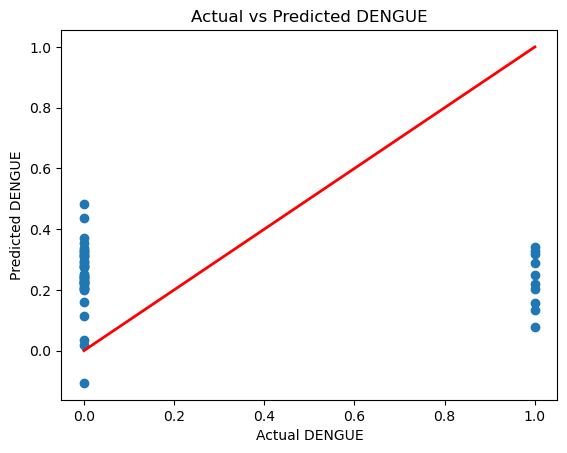

In [65]:
# Afficher le resultat de la Regression Lineaire
plt.scatter(Y_test, y_hat)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.xlabel('Actual DENGUE')
plt.ylabel('Predicted DENGUE')
plt.title('Actual vs Predicted DENGUE')
plt.show()

## Mean Square Error (MSE) : 0.06 : Le MSE mesure la moyenne des carrés des erreurs, c'est-à-dire la différence entre les valeurs prédites par le modèle et les valeurs réelles. Une valeur de 0.06 indique que, en moyenne, les prédictions de votre modèle sont très proches des valeurs réelles.
## Variance Score : 0.022968 : Le score de variance, également connu sous le nom de coefficient de détermination (R²), mesure la proportion de la variance totale des données qui est expliquée par le modèle. Un score de 0.022968 signifie que votre modèle explique environ 2.3% de la variance des données. Ce score est relativement faible, ce qui suggère que le modèle pourrait ne pas capturer toutes les variations des données.

# Le K-Nearest Neighbor

In [69]:
# La frequence de la deengue
df["DENGUE"].value_counts()

DENGUE
0    192
1     59
Name: count, dtype: int64

array([[<Axes: title={'center': 'DENGUE'}>]], dtype=object)

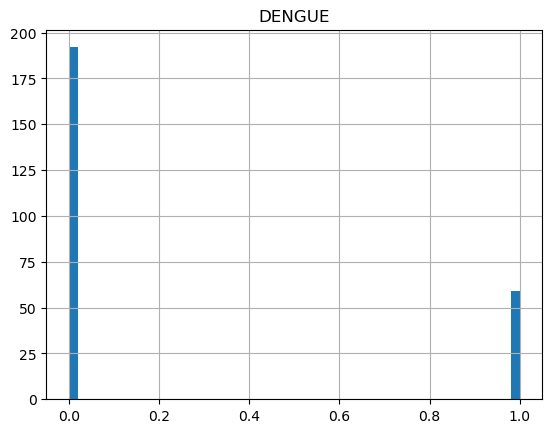

In [71]:
# Representation graphique des cas de dengue 
df.hist(column = "DENGUE", bins =50)

In [72]:
# Nous allons d'abord convertir la dataframe pandas en tableau (array) numpy
X = df[["AGE", "SEXE", "FIEVRE", "CEPHALEES", "FRISSONS", "VOMISSEMENTS", "COMA", "DOULEURABDOMINALE", "ICTERE", "DIARRHEE", "COURBATURE", "FRQUENCERESPIRATOIRE", "TAUXHEMOGLOBINE", "PROSTATION", "CONVULSIONS", "SYNDROMEHEMORRAGIQUE", "ARTHRALGIE", "DUREEDEFIEVRE", "DENGUE"]].values
X[0:5]

array([[27. ,  0. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        29. , 11.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [29. ,  1. ,  1. ,  1. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  1. ,
        29. , 11.9,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [ 5. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        27. , 11.8,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [13. ,  1. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  1. ,
        30. , 11.2,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [11. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        29. , 11.7,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [75]:
# Notre variable dependante "DENGUE"
Y =df["DENGUE"].values
Y[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [77]:
# Nous allons normaliser nos donnees 
X  = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.54458433, -1.30342807,  0.        ,  0.38907088, -0.33993463,
         0.72195022, -0.06324555,  0.40253824, -0.15649216, -0.24304676,
        -2.94174203,  0.11132573,  0.06704112, -0.43540034, -0.3614286 ,
        -0.08962214, -0.33993463, -0.51737488, -0.55433895],
       [ 0.69093409,  0.76720766,  0.        ,  0.38907088,  2.94174203,
        -1.38513705, -0.06324555,  0.40253824, -0.15649216,  4.11443452,
         0.33993463,  0.11132573,  0.41907712, -0.43540034, -0.3614286 ,
        -0.08962214, -0.33993463,  1.93283446, -0.55433895],
       [-1.06526293, -1.30342807,  0.        , -2.57022579, -0.33993463,
         0.72195022, -0.06324555,  0.40253824, -0.15649216, -0.24304676,
        -2.94174203, -0.80483029,  0.36040445, -0.43540034, -0.3614286 ,
        -0.08962214, -0.33993463, -0.51737488,  1.80395047],
       [-0.47986393,  0.76720766,  0.        ,  0.38907088, -0.33993463,
         0.72195022, -0.06324555,  0.40253824, -0.15649216, -0.24304676,
         0.339

In [79]:
# Nous allons diviser la dataframe en donnees d'entrainement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 4)
print("Les donnees d'entrainement:", X_train.shape, Y_train.shape)
print("Les donnees de test:", X_test.shape, Y_test.shape)

Les donnees d'entrainement: (200, 19) (200,)
Les donnees de test: (51, 19) (51,)


In [81]:
# Notre model KNN
# Entrainons le model
K = 4
neigh = KNeighborsClassifier(n_neighbors = K).fit(X_train, Y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [83]:
# La prediction
Y_hat = neigh.predict(X_test)
Y_hat[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [85]:
# Evaluation de notre model
print("La justesse de l'entrainement:", metrics.accuracy_score(Y_train, neigh.predict(X_train)))
print("La justesse du test:", metrics.accuracy_score(Y_test, Y_hat))

La justesse de l'entrainement: 0.945
La justesse du test: 0.9019607843137255


C:\Users\hamady.sissoko\AppData\Local\Temp\ipykernel_19388\3296323603.py:15: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend("Justesse", "+/- std")


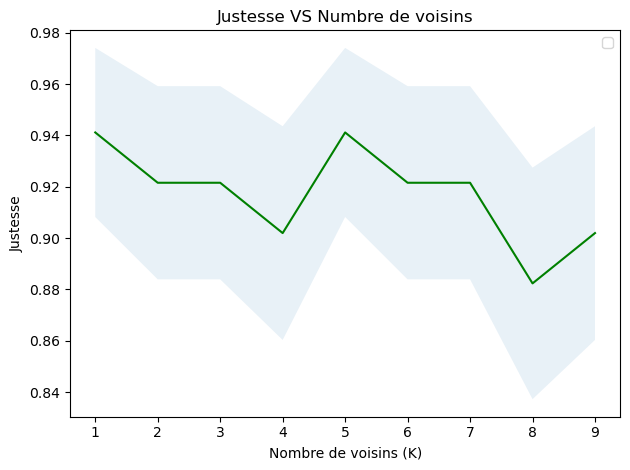

In [87]:
# Initialisation des variables pour stocker les resultats
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range (1, Ks):
    # Entraînement du modèle et prédiction
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
    Y_hat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, Y_hat)
    std_acc[n-1] = np.std(Y_hat == Y_test) / np.sqrt(Y_hat.shape[0])

# Tracons les resultas
plt.plot(range(1, Ks), mean_acc, "g")
plt.fill_between(range(1, Ks), mean_acc - std_acc, mean_acc + std_acc, alpha = 0.10)
plt.legend("Justesse", "+/- std")
plt.ylabel("Justesse")
plt.xlabel("Nombre de voisins (K)")
plt.title("Justesse VS Numbre de voisins")
plt.tight_layout()
plt.show()

### La justesse de l'entraînement: 0.945 signifie que votre modèle a correctement prédit 94.5% des échantillons dans l'ensemble d'entraînement.
### La justesse du test: 0.9019607843137255 signifie que votre modèle a correctement prédit 90.2% des échantillons dans l'ensemble de test.
### Ces valeurs indiquent que notre modèle fonctionne bien, avec une bonne capacité à généraliser sur des données qu'il n'a pas vues pendant l'entraînement

# L'arbre de decision (Decision Tree)

In [91]:
# Mettre en place l'arbre de decision
# Les variables independantes
X = df[["AGE", "SEXE", "FIEVRE", "CEPHALEES", "FRISSONS", "VOMISSEMENTS", "COMA", "DOULEURABDOMINALE", "ICTERE", "DIARRHEE", "COURBATURE", "FRQUENCERESPIRATOIRE", "TAUXHEMOGLOBINE", "PROSTATION", "CONVULSIONS", "SYNDROMEHEMORRAGIQUE", "ARTHRALGIE", "DUREEDEFIEVRE", "DENGUE"]].values
X[0:5]

array([[27. ,  0. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        29. , 11.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [29. ,  1. ,  1. ,  1. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  1. ,
        29. , 11.9,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [ 5. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        27. , 11.8,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [13. ,  1. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  1. ,
        30. , 11.2,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [11. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        29. , 11.7,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [93]:
# La variable dependante
Y = df["DENGUE"].values
Y[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [95]:
# Division Entrainement/Test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 4)
# Montrer les donnees d'entrainement
print("Taille de X d'entrainement se{}".format(X_train.shape), "&", "La taille du Y d'entrainement{}".format(Y_train.shape))

Taille de X d'entrainement se(200, 19) & La taille du Y d'entrainement(200,)


In [97]:
# Le model
DengTree = DecisionTreeClassifier(criterion = "gini", max_depth = 4)
DengTree

DecisionTreeClassifier(max_depth=4)

In [99]:
# Entrainons le model avec les donnees d'entrainement
DengTree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4)

In [101]:
# La prediction
PredTree = DengTree.predict(X_test)
print(PredTree[0:5])
print(Y_test[0:5])

[1 0 0 0 0]
[1 0 0 0 0]


In [103]:
# L'evalution du model
print("La justesse de l'arbre de decision:", metrics.accuracy_score(Y_test, PredTree))

La justesse de l'arbre de decision: 1.0


In [105]:
# Visualisons l'arbre
!pip install pydotplus
!pip install graphviz


In [106]:
import sklearn
print(sklearn.__version__)

1.5.2


In [107]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [108]:
from sklearn.tree import plot_tree

In [109]:
# Visualiser l'arbre
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Check the type of DengTree
if isinstance(DengTree, (DecisionTreeClassifier, DecisionTreeRegressor)):
    import matplotlib.pyplot as plt
    from sklearn.tree import plot_tree

    plt.figure(figsize=(20, 10))
    plot_tree(DengTree, 
              filled=True, 
              feature_names=["AGE", "SEXE", "FIEVRE", "CEPHALEES", "FRISSONS", "VOMISSEMENTS", "COMA", "DOULEURABDOMINALE", "ICTERE", "DIARRHEE", "COURBATURE", "FRQUENCERESPIRATOIRE", "TAUXHEMOGLOBINE", "PROSTATION", "CONVULSIONS", "SYNDROMEHEMORRAGIQUE", "ARTHRALGIE", "DUREEDEFIEVRE"], 
              class_names=["No Dengue", "Dengue"], 
              rounded=True, 
              proportion=False, 
              precision=2, 
              fontsize=12)
    plt.show()
else:
    print("DengTree is not a valid DecisionTreeClassifier or DecisionTreeRegressor instance.")

DengTree is not a valid DecisionTreeClassifier or DecisionTreeRegressor instance.


# La Regression Logistic 

In [111]:
# Definissons X
X = np.asarray(df[["AGE", "SEXE", "FIEVRE", "CEPHALEES", "FRISSONS", "VOMISSEMENTS", "COMA", "DOULEURABDOMINALE", "ICTERE", "DIARRHEE", "COURBATURE", "FRQUENCERESPIRATOIRE", "TAUXHEMOGLOBINE", "PROSTATION", "CONVULSIONS", "SYNDROMEHEMORRAGIQUE", "ARTHRALGIE", "DUREEDEFIEVRE", "DENGUE"]])
X[0:5]

array([[27. ,  0. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        29. , 11.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [29. ,  1. ,  1. ,  1. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  1. ,
        29. , 11.9,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [ 5. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        27. , 11.8,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [13. ,  1. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  1. ,
        30. , 11.2,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [11. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        29. , 11.7,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [132]:
# Defissons Y
Y = np.asarray(df["DENGUE"])
Y[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [134]:
# Normaliser les donnees
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.54458433, -1.30342807,  0.        ,  0.38907088, -0.33993463,
         0.72195022, -0.06324555,  0.40253824, -0.15649216, -0.24304676,
        -2.94174203,  0.11132573,  0.06704112, -0.43540034, -0.3614286 ,
        -0.08962214, -0.33993463, -0.51737488, -0.55433895],
       [ 0.69093409,  0.76720766,  0.        ,  0.38907088,  2.94174203,
        -1.38513705, -0.06324555,  0.40253824, -0.15649216,  4.11443452,
         0.33993463,  0.11132573,  0.41907712, -0.43540034, -0.3614286 ,
        -0.08962214, -0.33993463,  1.93283446, -0.55433895],
       [-1.06526293, -1.30342807,  0.        , -2.57022579, -0.33993463,
         0.72195022, -0.06324555,  0.40253824, -0.15649216, -0.24304676,
        -2.94174203, -0.80483029,  0.36040445, -0.43540034, -0.3614286 ,
        -0.08962214, -0.33993463, -0.51737488,  1.80395047],
       [-0.47986393,  0.76720766,  0.        ,  0.38907088, -0.33993463,
         0.72195022, -0.06324555,  0.40253824, -0.15649216, -0.24304676,
         0.339

In [158]:
# Entrainement / Test 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 4)
print("Donnees d'entrainement :", X_train.shape, Y_train.shape)
print("Donnees de test :", X_test.shape, Y_test.shape)

Donnees d'entrainement : (200, 19) (200,)
Donnees de test : (51, 19) (51,)


In [138]:
# Le modele de Regression Logistic
RL = LogisticRegression(C =0.01, solver = "liblinear").fit(X_train, Y_train)
RL

LogisticRegression(C=0.01, solver='liblinear')

In [140]:
# Faisons la prediction 
Y_hat = RL.predict(X_test)
Y_hat

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [142]:
# Prediction de probabilites
Yhat_prob = RL.predict_proba(X_test)
Yhat_prob

array([[0.31019929, 0.68980071],
       [0.65932832, 0.34067168],
       [0.68544577, 0.31455423],
       [0.63906769, 0.36093231],
       [0.69808478, 0.30191522],
       [0.68324151, 0.31675849],
       [0.67074143, 0.32925857],
       [0.64801391, 0.35198609],
       [0.65539301, 0.34460699],
       [0.64590592, 0.35409408],
       [0.64427901, 0.35572099],
       [0.64812914, 0.35187086],
       [0.64760379, 0.35239621],
       [0.65094691, 0.34905309],
       [0.64790302, 0.35209698],
       [0.6473815 , 0.3526185 ],
       [0.64954855, 0.35045145],
       [0.33472718, 0.66527282],
       [0.3343555 , 0.6656445 ],
       [0.65318668, 0.34681332],
       [0.33072216, 0.66927784],
       [0.3178199 , 0.6821801 ],
       [0.6423746 , 0.3576254 ],
       [0.31580311, 0.68419689],
       [0.32610145, 0.67389855],
       [0.62587211, 0.37412789],
       [0.6519488 , 0.3480512 ],
       [0.64242749, 0.35757251],
       [0.68058446, 0.31941554],
       [0.61726743, 0.38273257],
       [0.

In [144]:
# Evaluons le modele
jaccard_score(Y_test, Y_hat, pos_label = 0)

1.0

In [169]:
# Arrays for Y_test and Y_hat
Y_test = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])
Y_hat = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_hat)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[42  0]
 [ 0  9]]


Confusion matrix, without normalization
[[42  0]
 [ 0  9]]


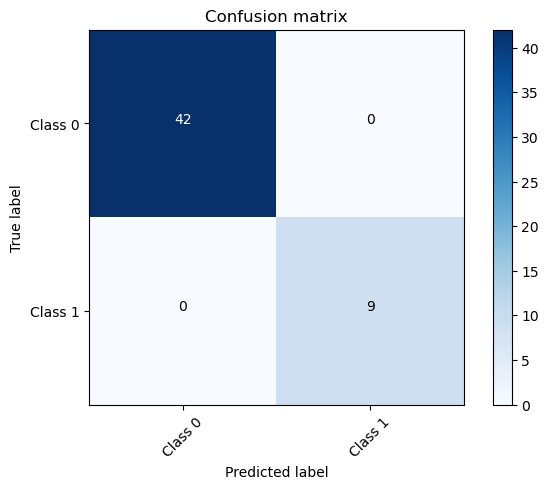

In [171]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Define class names
classes = ['Class 0', 'Class 1']

# Plot the confusion matrix
plot_confusion_matrix(cm, classes)

### 42 : Nombre de vrais négatifs (True Negatives, TN). Notre modèle a correctement prédit 42 fois la classe négative (0).
### 0 : Nombre de faux positifs (False Positives, FP). Notre modèle n'a jamais prédit la classe positive (1) alors que c'était en réalité la classe négative (0).
### 0 : Nombre de faux négatifs (False Negatives, FN). Notre modèle n'a jamais prédit la classe négative (0) alors que c'était en réalité la classe positive (1).
### 9 : Nombre de vrais positifs (True Positives, TP). Notre modèle a correctement prédit 9 fois la classe positive (1).
### En résumé, notre modèle a fait 51 prédictions correctes (42 TN + 9 TP) et aucune erreur (0 FP + 0 FN). Cela signifie que notre modèle a une précision parfaite sur cet ensemble de données.

# Support Vector Machine (SVM)

In [177]:
SVM_df = df[["AGE", "SEXE", "FIEVRE", "CEPHALEES", "FRISSONS", "VOMISSEMENTS", "COMA", "DOULEURABDOMINALE", "ICTERE", "DIARRHEE", "COURBATURE", "FRQUENCERESPIRATOIRE", "TAUXHEMOGLOBINE", "PROSTATION", "CONVULSIONS", "SYNDROMEHEMORRAGIQUE", "ARTHRALGIE", "DUREEDEFIEVRE", "DENGUE"]]
X = np.asarray(SVM_df)
X[0:5]

array([[27. ,  0. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        29. , 11.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [29. ,  1. ,  1. ,  1. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  1. ,
        29. , 11.9,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ],
       [ 5. ,  0. ,  1. ,  0. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        27. , 11.8,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [13. ,  1. ,  1. ,  1. ,  0. ,  1. ,  0. ,  1. ,  0. ,  0. ,  1. ,
        30. , 11.2,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [11. ,  0. ,  1. ,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,  0. ,
        29. , 11.7,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

In [179]:
Y = np.asarray(SVM_df["DENGUE"])
Y[0:5]

array([0, 0, 1, 0, 1], dtype=int64)

In [181]:
# Data splitting
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 4)
print("Train set :", X_train.shape, Y_train.shape)
print("Test set :", X_test.shape, Y_test.shape)

Train set : (200, 19) (200,)
Test set : (51, 19) (51,)


In [185]:
# Modeling
DengSVM = svm.SVC(kernel = "rbf")
DengSVM.fit(X_train, Y_train)
Yhat = DengSVM.predict(X_test)
Yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [187]:
# Evaluons le modele
jaccard_score(Y_test, Y_hat, pos_label = 0)

1.0

Confusion matrix, without normalization
[[42  0]
 [ 0  9]]


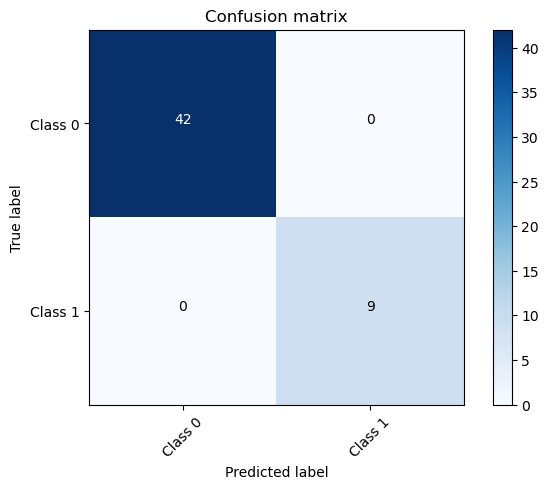

In [189]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Define class names
classes = ['Class 0', 'Class 1']

# Plot the confusion matrix
plot_confusion_matrix(cm, classes)